In [1]:
%pip install pulp

import numpy as np
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMaximize, lpSum, GLPK_CMD

Note: you may need to restart the kernel to use updated packages.


Iportação de bibliotecas numpy para calculos matemáticos e pulp para utilização do solver

![descrição](Definição.png)


![descrição](Definição2.png)


In [ ]:
def ler_arquivo(problema):
    with open(problema, 'r') as file:
        lines = file.readlines()
        m, n = map(int, lines[0].strip().split())
        aij = np.array([list(map(float, lines[i + 1].strip().split())) for i in range(m)])
        ci = np.array(list(map(float, lines[m + 1].split())))
        lj = np.array(list(map(float, lines[m + 2].strip().split())))
        dj = np.array(list(map(float, lines[m + 3].strip().split())))
        vj = np.array(list(map(float, lines[m + 4].strip().split())))
    print("Dados lidos com sucesso.")
    print(f"m={m}, n={n}")
    print(f"aij:\n{aij}")
    print(f"lj={lj}")
    print(f"dj={dj}")
    print(f"vj={vj}")
    return m, n, aij, ci, lj, dj, vj


       A linha  m, n = map(int, lines[0].strip().split()) le a primeira linha do arquivo e transforma em número inteiro além de retirar os espaços em branco e separa em dois valores distintos 3 e 4 e não 34.
    
    A linha  aij = np.array([list(map(float, lines[i + 1].strip().split())) for i in range(m)])  pega a linha i+1 ou seja a segunda linha do arquivo e transforma em float 
        os numeros alem de retirar os espaços em branco e separa em n colunas pega esses valores e coloca em uma lista e depois transforma essa
        lista em um array numpy (matriz )
    
        lj = np.array(list(map(float, lines[m + 1].strip().split())))
        dj = np.array(list(map(float, lines[m + 2].strip().split())))
        vj = np.array(list(map(float, lines[m + 3].strip().split())))

        ESSAS LINHA SÃO PARA LER OS DADOS PÓS MATRIZ E GUARDAR NUMA VARIÁVEL 



In [3]:
def otimizar_mix(m, n, aij, ci, lj, dj, vj):

    prob = LpProblem("Mix_de_Producao", LpMaximize)

    x = [LpVariable(f"x_{j}", lowBound=dj[j], upBound=vj[j]) for j in range(n)]

    prob += lpSum([lj[j] * x[j] for j in range(n)]), "LucroTotal"

    for i in range(m):
        prob += lpSum([aij[i, j] * x[j] for j in range(n)]) <=  float(ci[i]), f"Recurso_{i+1}"

    prob.solve(GLPK_CMD(msg=1))

    resultado = [var.varValue for var in x]
    lucro_total = sum([lj[j]*resultado[j] for j in range(n)])

    print("\n=== Resultado da Otimização ===")
    print(f"x = {resultado}")
    print(f"Lucro total = {lucro_total}")

    return resultado, lucro_total

A FUNÇÃO DE OTIMIZAR E DEFINIDA COM OS PARÂMETROS DE CIMA 
  prob = LpProblem("Mix_de_Producao", LpMaximize) CRIA UMA VARIAVEL PARA ARMAZENAR TODAS AS VARIAVEIS DO PROBLEMA E DEFINE COMO OBJETIVO A MAXIMIZAÇÃO DE LUCROS
  
  
         Cria uma lista x de n variáveis de decisão LpVariable
         x = [LpVariable(f"x_{j}", lowBound=dj[j], upBound=vj[j]) for j in range(n)]    Cada variável é nomeada x_0, x_1

        lowBound=dj[j] define o limite inferior (por exemplo demanda mínima ou limite técnico).

        upBound=vj[j] define o limite superior (capacidade máxima).


 prob += lpSum([lj[j] * x[j] for j in range(n)]), "LucroTotal"
 lpSum([...]) constrói a soma linear  adiciona essa expressão ao problema. Como o problema foi criado com LpMaximize, essa linha define a função objetivo (e dá o nome "LucroTotal" à expressão).
  lj[j] é o coeficiente (lucro por unidade) associado a x[j].



Para cada recurso i (0..m-1) adiciona uma restrição.

LHS: lpSum([aij[i, j] * x[j] for j in range(n)]) é o consumo total do recurso i (soma dos coeficientes aij[i,j] multiplicados por x[j]).

RHS: aij[i].sum() — aqui o código usa a soma dos coeficientes da linha i como lado direito (capacidade).~
f"Recurso_{i}" é apenas o nome da restrição.

prob.solve(GLPK_CMD(msg=1))
Chama o solver GLPK via GLPK_CMD. msg=1 permite que o solver mostre saída (log) no console.

In [4]:
# --- Salvar resultado ---
def salvar_arquivo(nome, x, lucro):
    with open(nome, 'w') as f:
        f.write("Solução do Mix de Produção\n")
        f.write("x_j:\n")
        f.write(" ".join(map(str, x)) + "\n")
        f.write(f"Lucro total: {lucro}\n")
    print(f"Resultados salvos em {nome}")

In [5]:
# --- Execução ---
m, n, aij, ci, lj, dj, vj = ler_arquivo("problema.txt")
x, lucro = otimizar_mix(m, n, aij, ci, lj, dj, vj)
salvar_arquivo("output.txt", x, lucro)


Dados lidos com sucesso.
m=2, n=3
aij:
[[2. 1. 3.]
 [4. 3. 2.]]
lj=[30. 20. 25.]
dj=[0. 0. 0.]
vj=[40. 50. 60.]

=== Resultado da Otimização ===
x = [5.0, 0.0, 30.0]
Lucro total = 900.0
Resultados salvos em output.txt


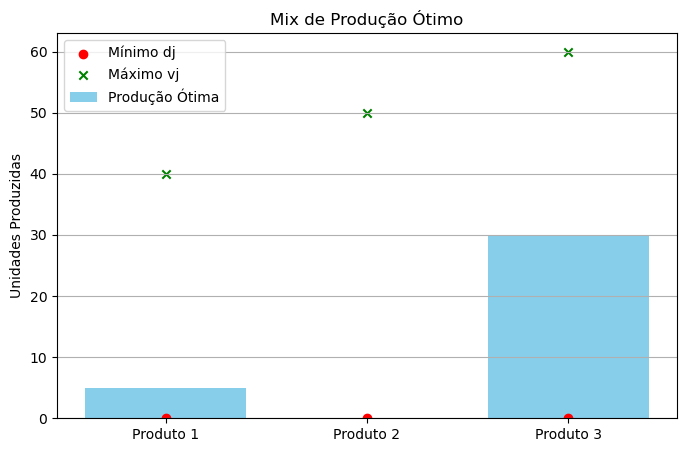

In [11]:
produtos = [f"Produto {j+1}" for j in range(n)]

produtos = [f"Produto {j+1}" for j in range(n)]

plt.figure(figsize=(8,5))
plt.bar(produtos, x, color='skyblue', label='Produção Ótima')
plt.scatter(produtos, dj, color='red', marker='o', label='Mínimo dj')
plt.scatter(produtos, vj, color='green', marker='x', label='Máximo vj')
plt.ylabel("Unidades Produzidas")
plt.title("Mix de Produção Ótimo")
plt.legend()
plt.grid(axis='y')
plt.show()